# Project Task 3 Deep Learning Model Building

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-syn/news_syn.csv


In [2]:
!pip install contractions
import string #library to get the punctuating characters (!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~) that are to be removed generally from a textual data as they donot add value to the data
import nltk
import warnings
import re
import contractions
from nltk import tokenize
from nltk.corpus import stopwords
from nltk import wsd
from nltk.corpus import wordnet as wn
from spacy.cli import download
from spacy import load
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('wordnet2022')
nlp = load('en_core_web_sm')
! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet

df = pd.read_csv('/kaggle/input/news-syn/news_syn.csv')
df.head(7)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 18.3 MB/s eta 0:00:00
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/wordnet2022.zip.


Article category                                      News Headline  \
0         WEDDINGS  Real Weddings: Couples Who Got Married This We...   
1         WELLNESS                                  The Moment I Knew   
2         POLITICS                                     Sunday Roundup   
3          PARENTS  Funniest Parenting Tweets: What Moms And Dads ...   
4         BUSINESS                  WATCH: 60 Seconds of Social Media   
5         POLITICS                                     Sunday Roundup   
6     FOOD & DRINK  Real Weddings: Couples Who Got Married This We...   

                                              Author news_link  \
0                                                NaN    _RARE_   
1  MeiMei Fox, Contributor\nNYTimes bestselling a...    _RARE_   
2                    Arianna Huffington, Contributor    _RARE_   
3                                      Hollis Miller    _RARE_   
4  Shawn Amos, Contributor\nblues preacher | cont...    _RARE_   
5                    Arianna Huffington, Contributor    _RARE_   
6                                                NaN    _RARE_   

                                   short_description        date  
0  If there's ever a time you need a little distr...  29-07-2013  
1                                                NaN  02-05-2013  
2                                                NaN  17-01-2015  
3  Kids may say the darndest things, but parents ...  15-07-2016  
4  So, you think you're a real fashionista, hmm? ...  18-08-2012  
5                                                NaN  22-05-2015  
6  The stress and strain of constantly being conn...  19-06-2013

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Article category   10000 non-null  object
 1   News Headline      9087 non-null   object
 2   Author             7282 non-null   object
 3   news_link          10000 non-null  object
 4   short_description  3874 non-null   object
 5   date               10000 non-null  object
dtypes: object(6)
memory usage: 468.9+ KB


In [4]:
df.shape

(10000, 6)

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df.shape

(7301, 6)

In [7]:
print((df['news_link'] == '_Rare_').count()) #total number of values in news_link column
df['news_link'].nunique() #total number of unique values in news_link column

7301


1

In [8]:
df = df.drop(['news_link'], axis=1)

In [9]:
pd.options.mode.chained_assignment = None

In [10]:
df.shape

(7301, 5)

In [11]:
df.isna().mean()*100

Article category      0.000000
News Headline        12.190111
Author               29.708259
short_description    56.649774
date                  0.000000
dtype: float64

> Since there are more than 20% values that are null hence it is beneficial to remove Author and short_description column

In [12]:
df_new = df.drop(['Author', 'short_description'], axis=1)
df_new.shape

(7301, 3)

In [13]:
df_new.isna().mean()*100

Article category     0.000000
News Headline       12.190111
date                 0.000000
dtype: float64

In [14]:
df_new.dropna(inplace = True)

In [15]:
df_new.isna().mean()*100

Article category    0.0
News Headline       0.0
date                0.0
dtype: float64

In [16]:
df_new = df_new.reset_index(drop = True)

In [17]:
df_new

Article category                                      News Headline  \
0            WEDDINGS  Real Weddings: Couples Who Got Married This We...   
1            WELLNESS                                  The Moment I Knew   
2            POLITICS                                     Sunday Roundup   
3             PARENTS  Funniest Parenting Tweets: What Moms And Dads ...   
4            BUSINESS                  WATCH: 60 Seconds of Social Media   
...               ...                                                ...   
6406    THE WORLDPOST                                     Sunday Roundup   
6407            MONEY  Best Parenting Tweets: What Moms And Dads Said...   
6408    ENTERTAINMENT  Real Weddings: Couples Who Got Married This We...   
6409     FOOD & DRINK  Parenthesis: The Best Of The Mom And Dad Blogs...   
6410             TECH         Watch The Top 9 YouTube Videos Of The Week   

            date  
0     29-07-2013  
1     02-05-2013  
2     17-01-2015  
3     15-07-2016  
4     18-08-2012  
...          ...  
6406  02-10-2014  
6407  27-01-2014  
6408  04-04-2015  
6409  01-05-2012  
6410  19-11-2012  

[6411 rows x 3 columns]

In [18]:
newdf_lower = df_new.apply(lambda x: x.astype(str).str.lower())

In [19]:
string.punctuation
punct = list(string.punctuation)
additional_puncts_in_the_columns = ['“', '―', '”']
total_puncts = punct + additional_puncts_in_the_columns

In [20]:
def punctuation_removing(text):
    txt_withoutpunc = ''.join([ i for i in text if i not in total_puncts])
    return txt_withoutpunc
def remove_email_url(text): #function name and argument declaration
    
    text = ' '.join([i for i in text.split() if '@' not in i])
    text = ' '.join([i for i in text.split() if 'https://' not in i])
    text = ' '.join([i for i in text.split() if '.com' not in i])
    text = ' '.join([i for i in text.split() if  'www.' not in i])
    #find the words which contain @ and https:// and www. after splitting the given text and put them in a sequence seperated by space
    return text
def digits_removing(text):
    txt_withoutdigits = ''.join([i for i in text if not i.isdigit()])
    return txt_withoutdigits
def extraspaces_removing(text):
    txt_withoutextraspaces = " ".join(text.split())
    return txt_withoutextraspaces
def html_removing(text):
    html_terms = re.compile('<.*?>')
    return html_terms.sub(r'', text)
def contractions_removing(text):
    text = contractions.fix(text)
    return text
STOPWORDS_included_in_the_english_language = stopwords.words('english')
additional_STOPWORDS_in_data = ['yikes', 'ouch', 'seriously', 'welcome', 'wow', 'whoops', 'bow', 'awww', 'oops', 'pr', 'hmm', 'hello']
total_STOPWORDS = STOPWORDS_included_in_the_english_language + additional_STOPWORDS_in_data
def stopwords_removing(text):
    text = ' '.join([i for i in text.split() if i not in total_STOPWORDS])
    return text
def emoj_removing(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
def tokenizing_word(text):
    word_t = tokenize.word_tokenize(text)
    return word_t
def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    list_w = []
    for word in text:
        lemmatized_words = lemmatizer.lemmatize(word, pos = 'v')
        list_w.append(lemmatized_words)
    return list_w

In [21]:
newdf_rem_leu= newdf_lower['News Headline'].apply(lambda text: remove_email_url(text))
newdf_rem_leupun = newdf_rem_leu.apply(lambda text: punctuation_removing(text))
newdf_rem_leupund = newdf_rem_leupun.apply(lambda text: digits_removing(text))
newdf_rem_leupunde = newdf_rem_leupund.apply(lambda text: extraspaces_removing(text))
newdf_rem_leupundeh = newdf_rem_leupunde.apply(lambda text: html_removing(text))
newdf_rem_leupundehc = newdf_rem_leupundeh.apply(lambda text: contractions_removing(text))
newdf_rem_leupundehcst = newdf_rem_leupundehc.apply(lambda text: stopwords_removing(text))
newdf_rem_leupundehcstemji = newdf_rem_leupundehcst.apply(lambda x: emoj_removing(x))
newdf_rem_leupundehcstemjitok = newdf_rem_leupundehcstemji.apply(lambda t : tokenizing_word(t))
newdf_rem_leupundehcstemjitoklem = newdf_rem_leupundehcstemjitok.apply(lambda w : lemmatizing(w))

In [22]:
df_1 = newdf_rem_leupundehcstemjitoklem.to_frame()
df_1

News Headline
0         [real, weddings, couple, get, marry, weekend]
1                                        [moment, know]
2                                     [sunday, roundup]
3     [funniest, parent, tweet, moms, dads, say, twi...
4                        [watch, second, social, media]
...                                                 ...
6406                                  [sunday, roundup]
6407  [best, parent, tweet, moms, dads, say, twitter...
6408  [real, weddings, couple, get, marry, weekend, ...
6409          [parenthesis, best, mom, dad, blog, week]
6410                [watch, top, youtube, videos, week]

[6411 rows x 1 columns]

In [23]:
frames = [df_1['News Headline'], df_new['Article category']]
df_stage_2 = pd.concat(frames, axis=1)

In [24]:
df_stage_2

News Headline Article category
0         [real, weddings, couple, get, marry, weekend]         WEDDINGS
1                                        [moment, know]         WELLNESS
2                                     [sunday, roundup]         POLITICS
3     [funniest, parent, tweet, moms, dads, say, twi...          PARENTS
4                        [watch, second, social, media]         BUSINESS
...                                                 ...              ...
6406                                  [sunday, roundup]    THE WORLDPOST
6407  [best, parent, tweet, moms, dads, say, twitter...            MONEY
6408  [real, weddings, couple, get, marry, weekend, ...    ENTERTAINMENT
6409          [parenthesis, best, mom, dad, blog, week]     FOOD & DRINK
6410                [watch, top, youtube, videos, week]             TECH

[6411 rows x 2 columns]

# End of Task 1 and dataframe df_stage_2 ready for Task 2: EDA

# Start of Project Task 2: Exploratory Data Analysis

In [25]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textwrap import wrap
import seaborn as sns

## Following questions can be answered by EDA
### Which author has written maximum number of articles in a category?
### Top 10 authors?
### What is the maximum length of the text description?

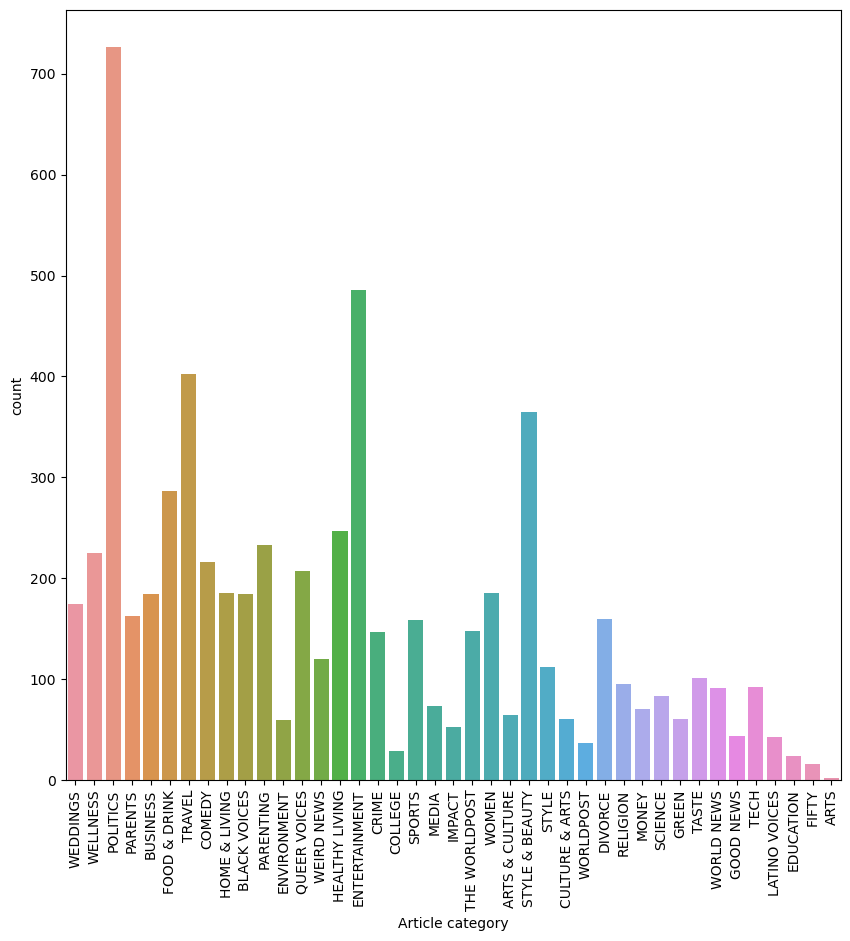

In [26]:
fig=plt.figure(figsize=(10,10))
sns.countplot(x = df_stage_2['Article category'], data = df_stage_2)
plt.xticks(rotation=90)
plt.show()

#### Which category has maximum articles published?
##### Answer: POLITICS followed by Entertainment

#### Top 10 authors?

In [27]:
def rem_author_spec(t): 
    '''The input is in the form of text. The function removes the text followed by the ',' especially the column Author .
       The output is name of the author with ',' and name of the author without any ambiguity.'''
    result_text = ''
    for i in range(len(t)):
        if(t[i] == ','):
            result_text = t[0:i]
            break
        else:
            result_text = result_text + t[i]
            
    return result_text

df

Article category                                      News Headline  \
0            WEDDINGS  Real Weddings: Couples Who Got Married This We...   
1            WELLNESS                                  The Moment I Knew   
2            POLITICS                                     Sunday Roundup   
3             PARENTS  Funniest Parenting Tweets: What Moms And Dads ...   
4            BUSINESS                  WATCH: 60 Seconds of Social Media   
...               ...                                                ...   
9991    THE WORLDPOST                                     Sunday Roundup   
9994            MONEY  Best Parenting Tweets: What Moms And Dads Said...   
9995    ENTERTAINMENT  Real Weddings: Couples Who Got Married This We...   
9996     FOOD & DRINK  Parenthesis: The Best Of The Mom And Dad Blogs...   
9998             TECH         Watch The Top 9 YouTube Videos Of The Week   

                                                 Author  \
0                                                   NaN   
1     MeiMei Fox, Contributor\nNYTimes bestselling a...   
2                       Arianna Huffington, Contributor   
3                                         Hollis Miller   
4     Shawn Amos, Contributor\nblues preacher | cont...   
...                                                 ...   
9991                    Arianna Huffington, Contributor   
9994                                                NaN   
9995                                                NaN   
9996                                       Emma Mustich   
9998                                                NaN   

                                      short_description        date  
0     If there's ever a time you need a little distr...  29-07-2013  
1                                                   NaN  02-05-2013  
2                                                   NaN  17-01-2015  
3     Kids may say the darndest things, but parents ...  15-07-2016  
4     So, you think you're a real fashionista, hmm? ...  18-08-2012  
...                                                 ...         ...  
9991                                                NaN  02-10-2014  
9994  Kids may say the darndest things, but parents ...  27-01-2014  
9995                                                NaN  04-04-2015  
9996  To receive the eBay Roundup of Vintage Home Fi...  01-05-2012  
9998  If you're looking to see the most popular YouT...  19-11-2012  

[7301 rows x 5 columns]

In [28]:
df.dropna(subset = ['Author'], inplace=True)

In [29]:
df['Author']

1       MeiMei Fox, Contributor\nNYTimes bestselling a...
2                         Arianna Huffington, Contributor
3                                           Hollis Miller
4       Shawn Amos, Contributor\nblues preacher | cont...
5                         Arianna Huffington, Contributor
                              ...                        
9984                      Arianna Huffington, Contributor
9985                      Arianna Huffington, Contributor
9987                      Arianna Huffington, Contributor
9991                      Arianna Huffington, Contributor
9996                                         Emma Mustich
Name: Author, Length: 5132, dtype: object

In [30]:
df['Author'] = df['Author'].apply(lambda x : rem_author_spec(x))

#### Top 10 authors?

In [31]:
value_counts = df['Author'].value_counts()

df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['Author', 'Number of articles']
df_value_counts

Author  Number of articles
0    Arianna Huffington                1167
1          Mary Kincaid                 643
2       Todd Van Luling                 427
3         Hollis Miller                 285
4       Alanna Vagianos                 230
..                  ...                 ...
260         Mandy Velez                   1
261        Zac Thompson                   1
262       Joanna Zelman                   1
263      Landess Kearns                   1
264       Clarke Reilly                   1

[265 rows x 2 columns]

#### What is the maximum length of the text description?

In [32]:
df_new['News_length']= df_new['News Headline'].str.len().astype(int)

In [33]:
df_sorted = df_new.sort_values('News_length')

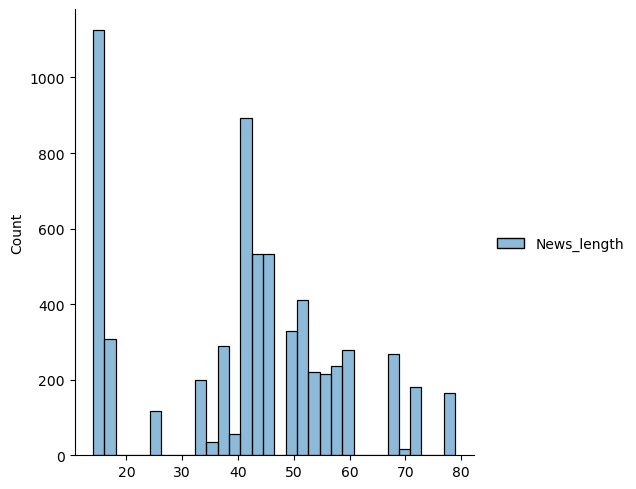

In [34]:
sns.displot(df_sorted);

## Most of the articles News Length lies between 40 to 50 words

In [35]:
val = []
for token in df_stage_2['News Headline']:
    val.append((' '.join(token)))
nh_val = pd.DataFrame(val, columns = ['News Headline'])
nh_val

News Headline
0               real weddings couple get marry weekend
1                                          moment know
2                                       sunday roundup
3     funniest parent tweet moms dads say twitter week
4                            watch second social media
...                                                ...
6406                                    sunday roundup
6407      best parent tweet moms dads say twitter week
6408     real weddings couple get marry weekend photos
6409                parenthesis best mom dad blog week
6410                     watch top youtube videos week

[6411 rows x 1 columns]

In [36]:
df_stage_2_1 = pd.concat((df_stage_2['Article category'],nh_val), axis = 1)
df_stage_2_1

Article category                                     News Headline
0            WEDDINGS            real weddings couple get marry weekend
1            WELLNESS                                       moment know
2            POLITICS                                    sunday roundup
3             PARENTS  funniest parent tweet moms dads say twitter week
4            BUSINESS                         watch second social media
...               ...                                               ...
6406    THE WORLDPOST                                    sunday roundup
6407            MONEY      best parent tweet moms dads say twitter week
6408    ENTERTAINMENT     real weddings couple get marry weekend photos
6409     FOOD & DRINK                parenthesis best mom dad blog week
6410             TECH                     watch top youtube videos week

[6411 rows x 2 columns]

In [37]:
df_stage_2_1 = df_stage_2_1[['Article category','News Headline']].groupby(by='Article category').agg(lambda x:' '.join(x))
df_stage_2_1.head()

News Headline
Article category                                                   
ARTS              weekly roundup ebay vintage home find weekly r...
ARTS & CULTURE    weekly roundup ebay vintage clothe find weekly...
BLACK VOICES      weeks top news stories africa weeks top news s...
BUSINESS          watch second social media fashionably late sty...
COLLEGE           week picture faith practice around world week ...

In [38]:
cv = CountVectorizer()
data_1 = cv.fit_transform(df_stage_2_1['News Headline'])
text_dtm_1 = pd.DataFrame(data_1.toarray(), columns = cv.vocabulary_.keys())
text_dtm_1.index=df_stage_2_1.index
text_dtm_1.head()

weekly  roundup  ebay  vintage  home  find  photos  clothe  \
Article category                                                               
ARTS                   0        0     0        0     0     0       0       0   
ARTS & CULTURE         1        1     3        0     0     0       0       0   
BLACK VOICES         154        0     0        7     0     0       0       0   
BUSINESS               1        0     0       14    13     3       0       0   
COLLEGE                0        0     0        0    27     0       0       0   

                  sunday  watch  ...  twitter  moment  know  parenthesis  mom  \
Article category                 ...                                            
ARTS                   0      0  ...        0       0     0            0    2   
ARTS & CULTURE         0     42  ...        0       0     7            0   42   
BLACK VOICES           0      5  ...        4       0    20            0    5   
BUSINESS               0      0  ...       20       2   109            2   13   
COLLEGE                0      0  ...        0       0    27            0    0   

                  dad  blog  women  might  miss  
Article category                                 
ARTS                0     0      0      0     0  
ARTS & CULTURE      2     0      0      0     3  
BLACK VOICES      154     0      0      0     9  
BUSINESS            2     0     13      3    62  
COLLEGE             0     0     27      2     0  

[5 rows x 95 columns]

In [39]:
def wordcloud(data,title):
    wc = WordCloud(width=600, height=530, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()

In [40]:
text_dtm_1=text_dtm_1.transpose()

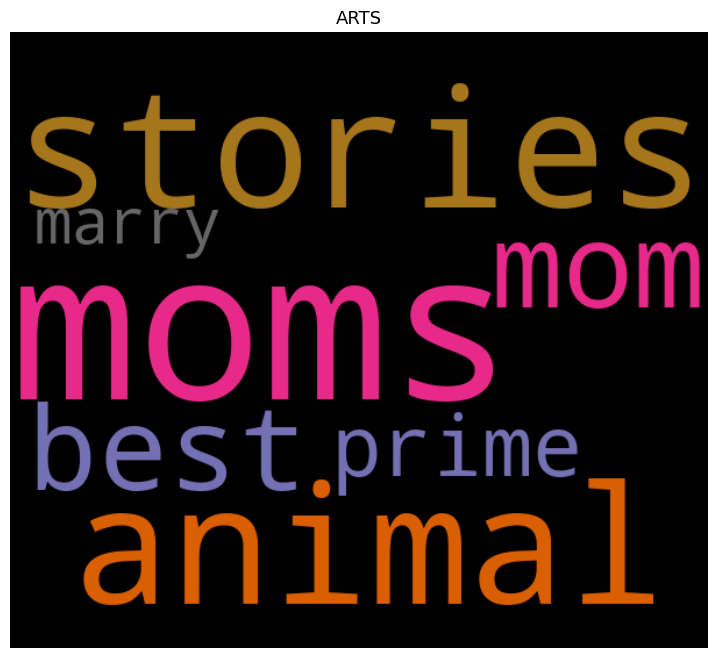

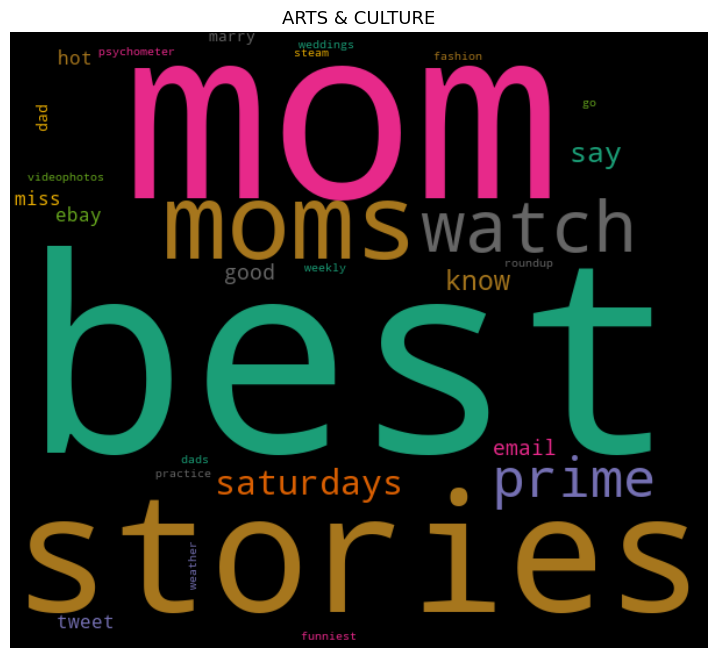

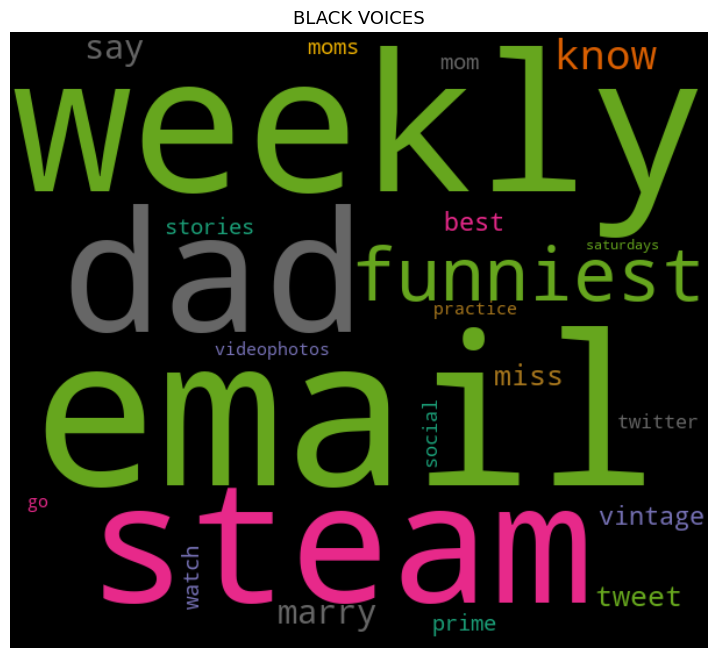

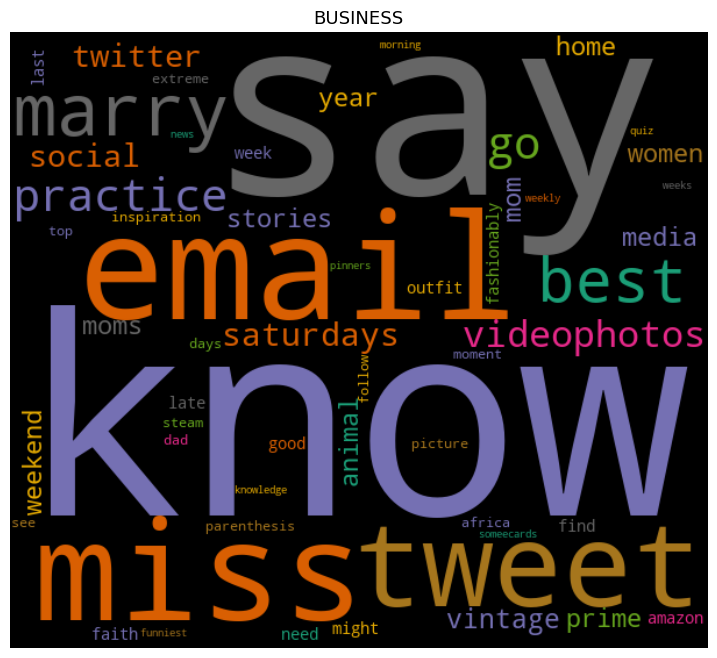

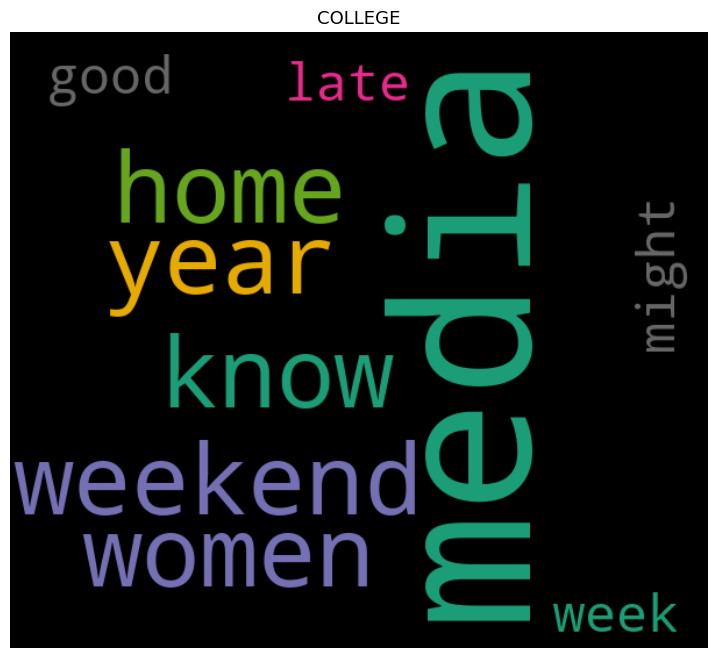

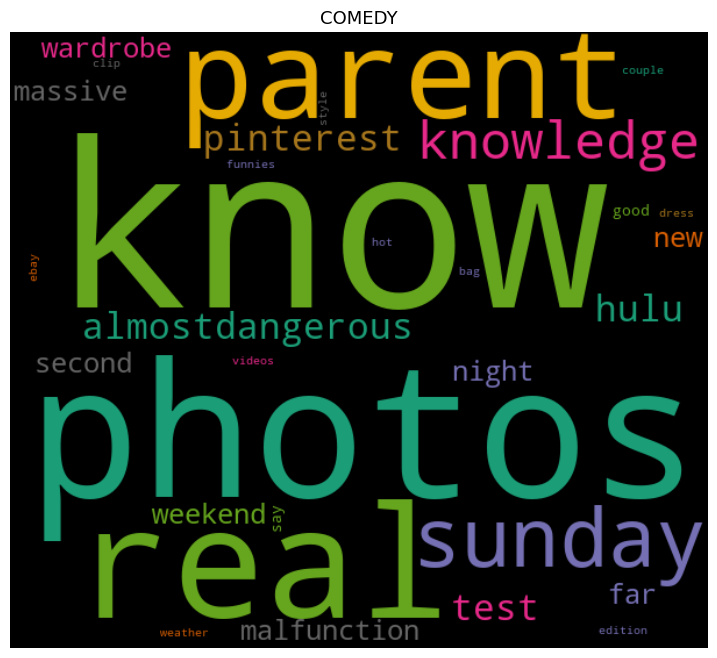

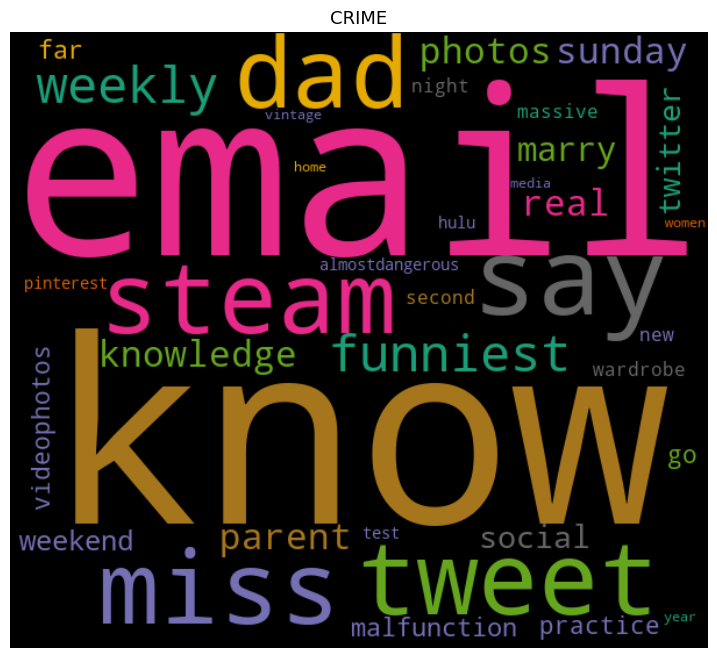

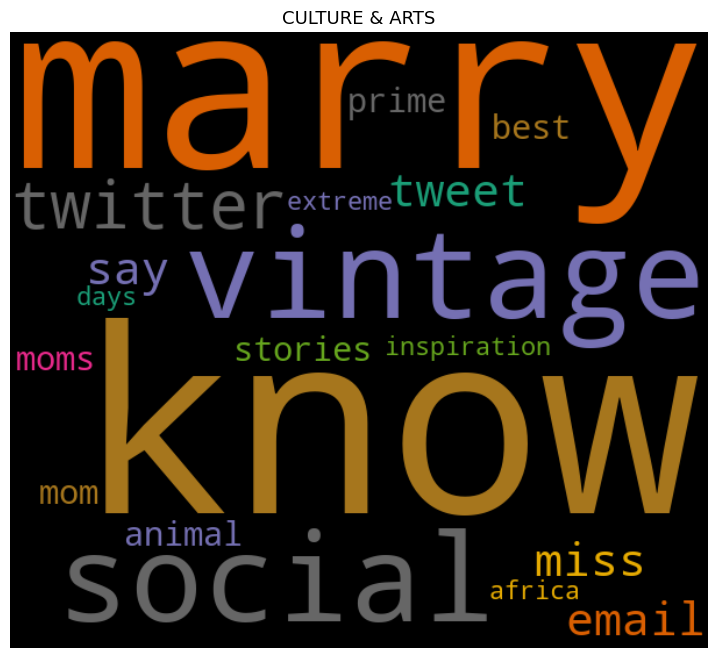

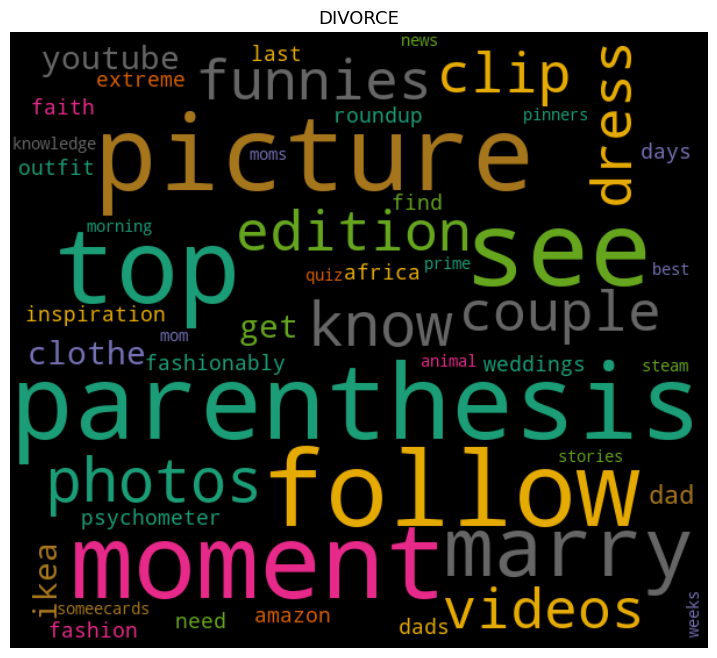

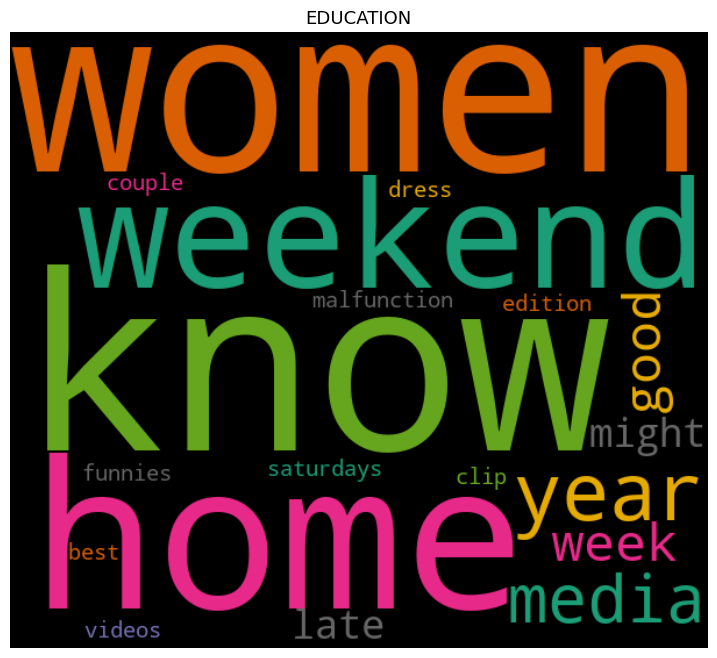

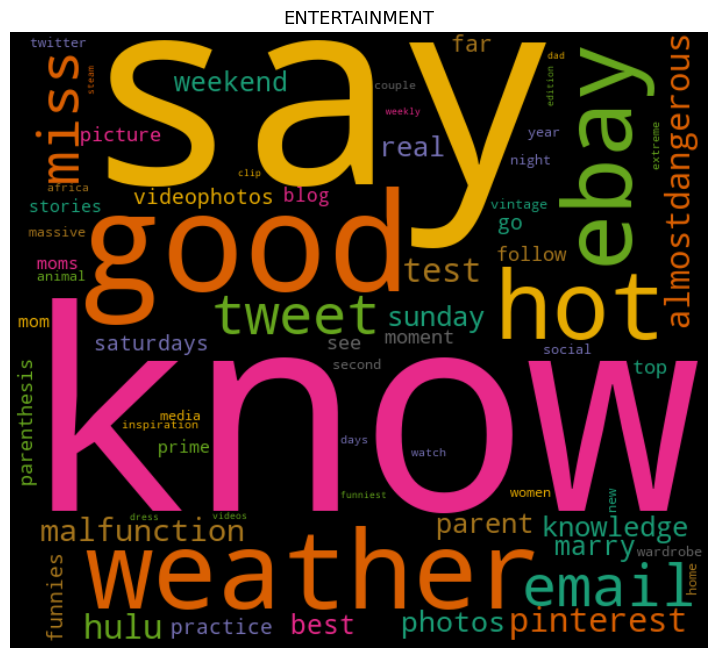

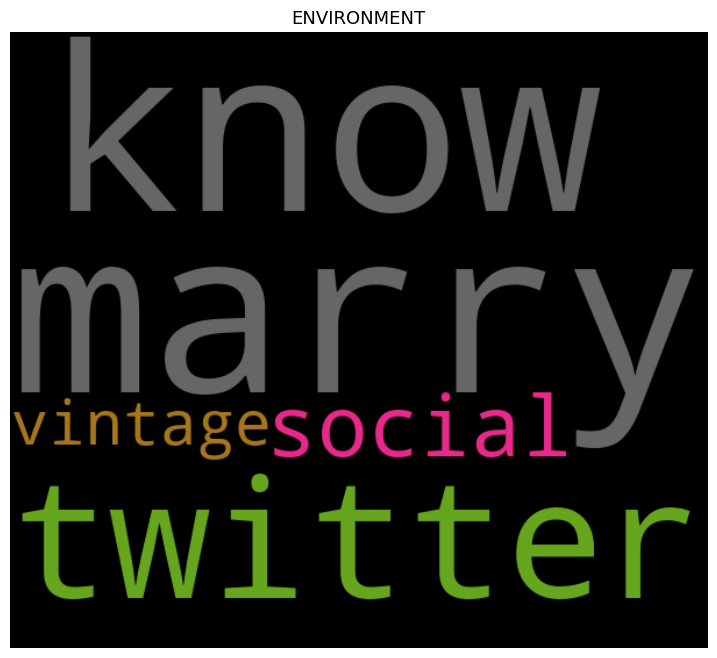

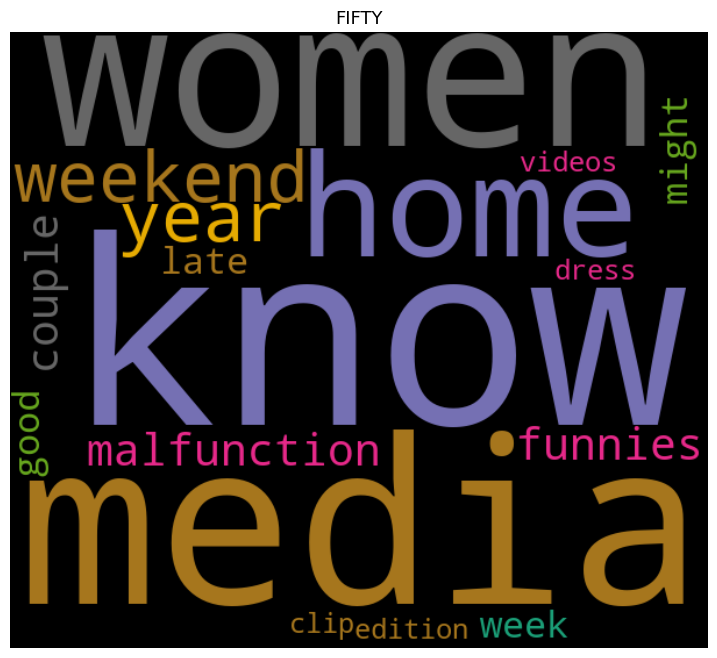

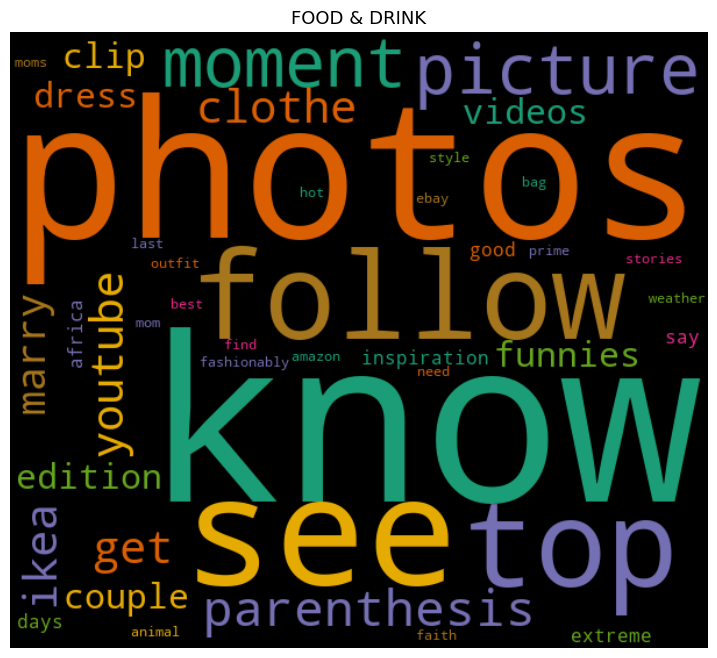

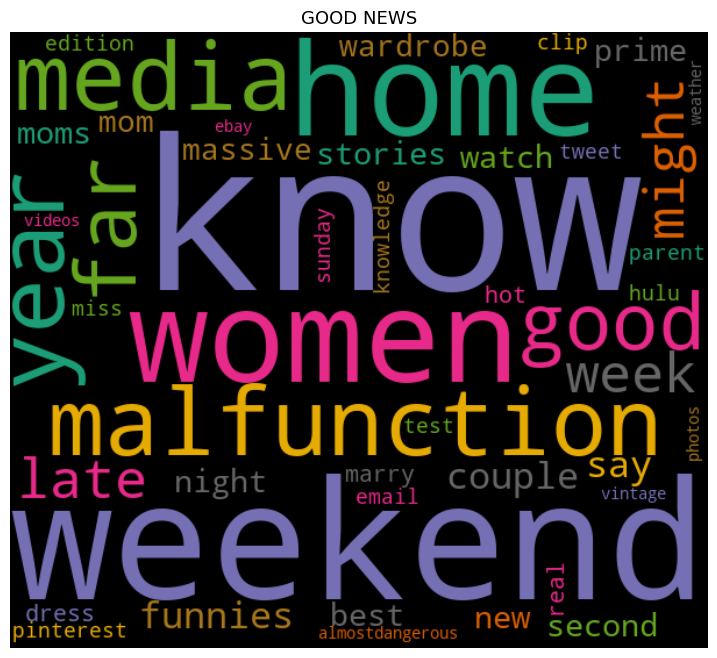

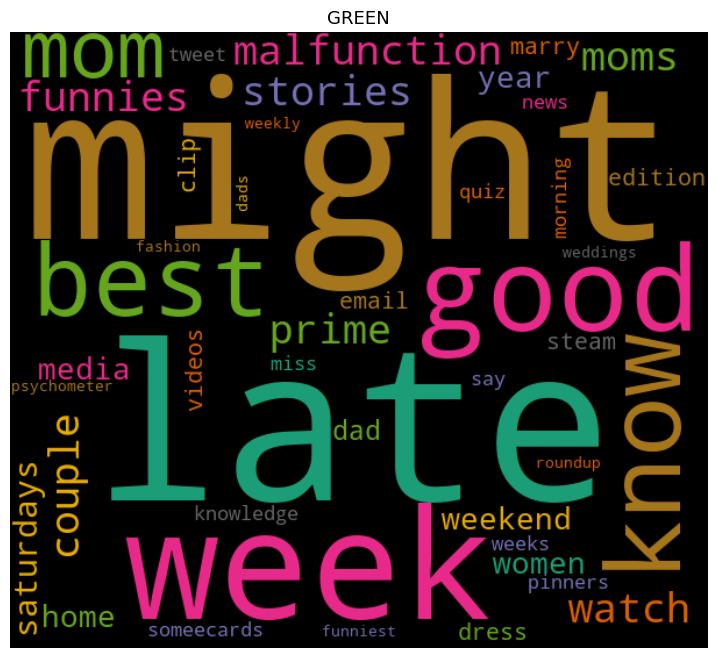

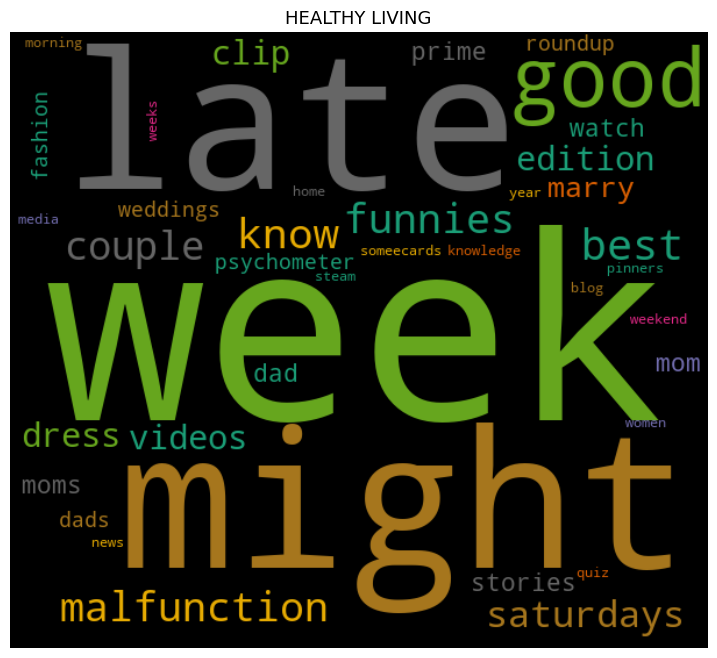

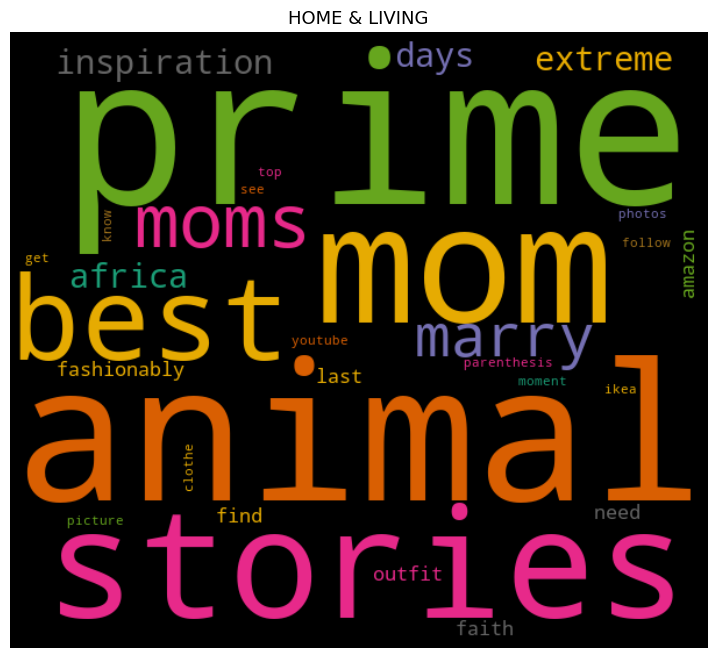

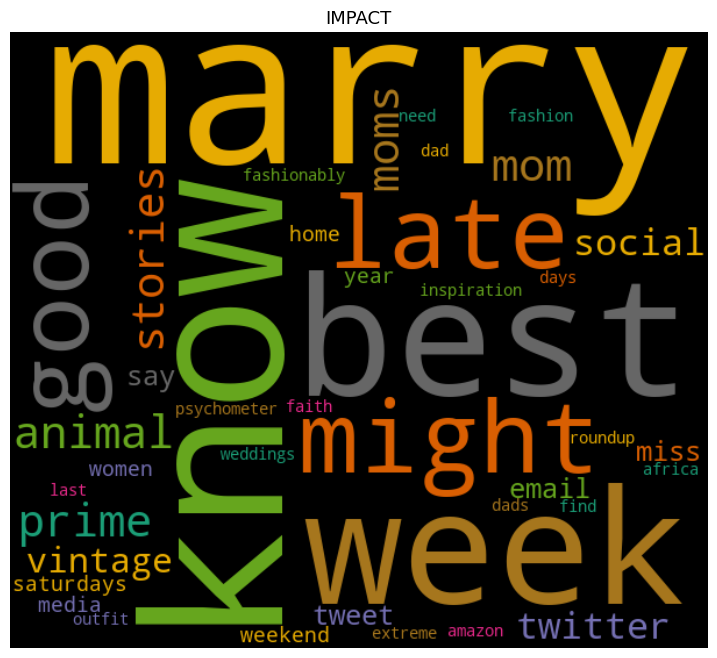

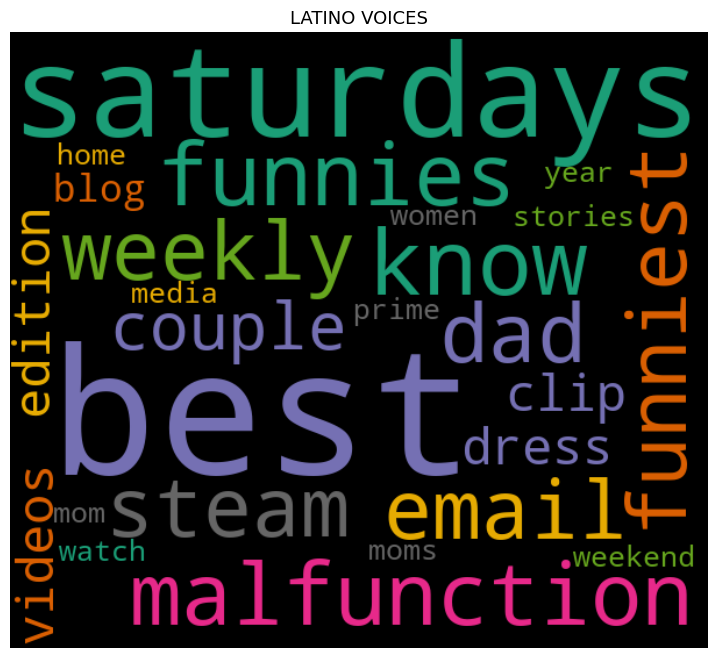

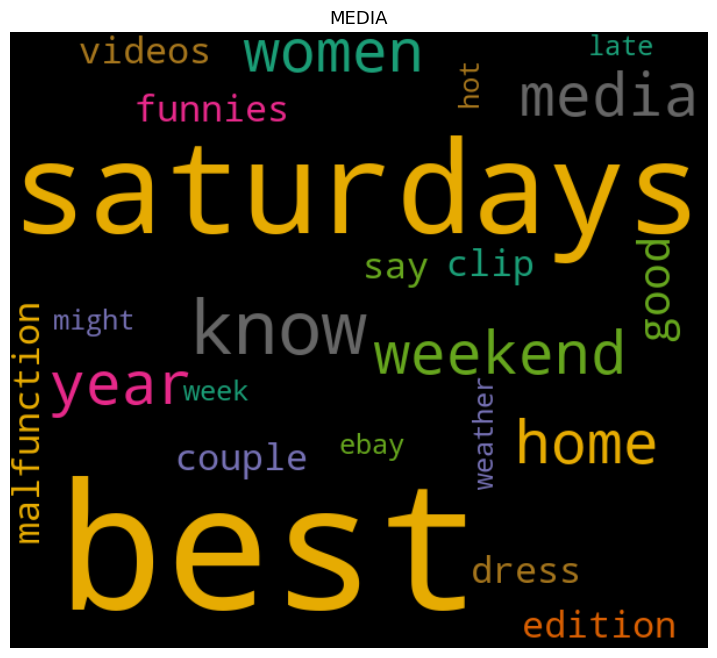

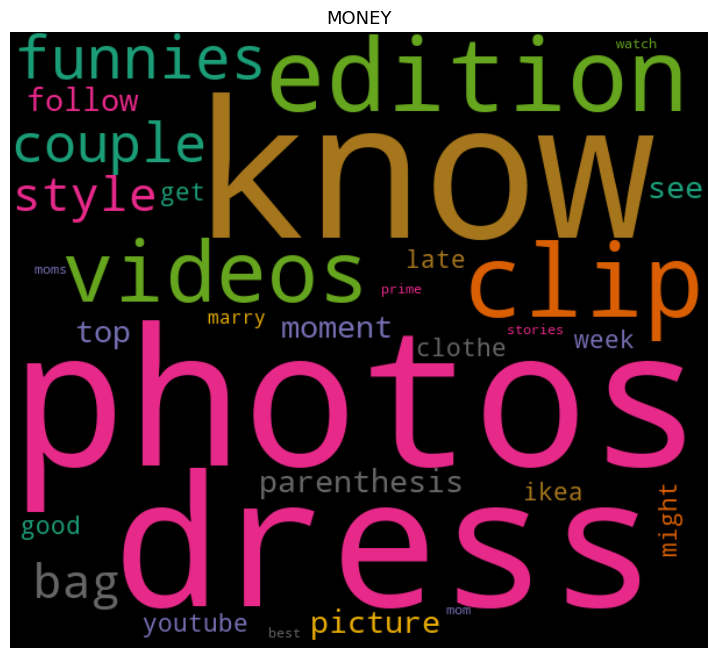

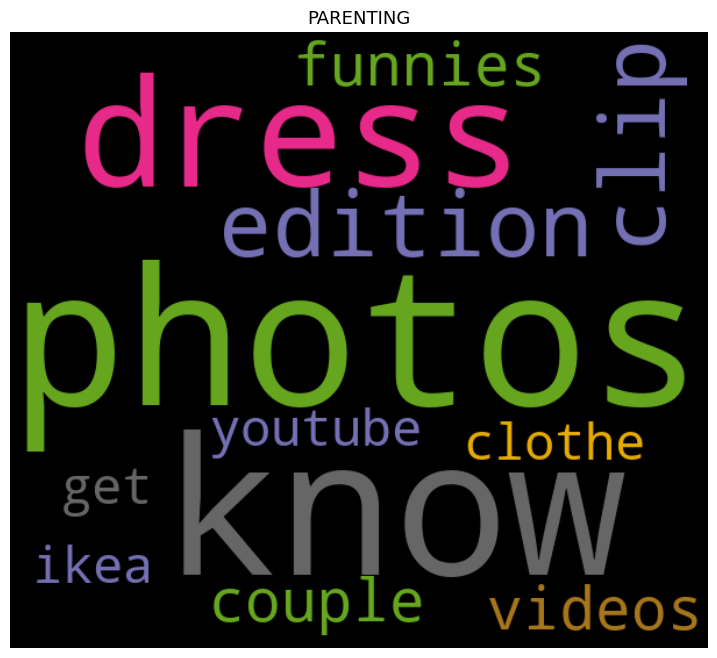

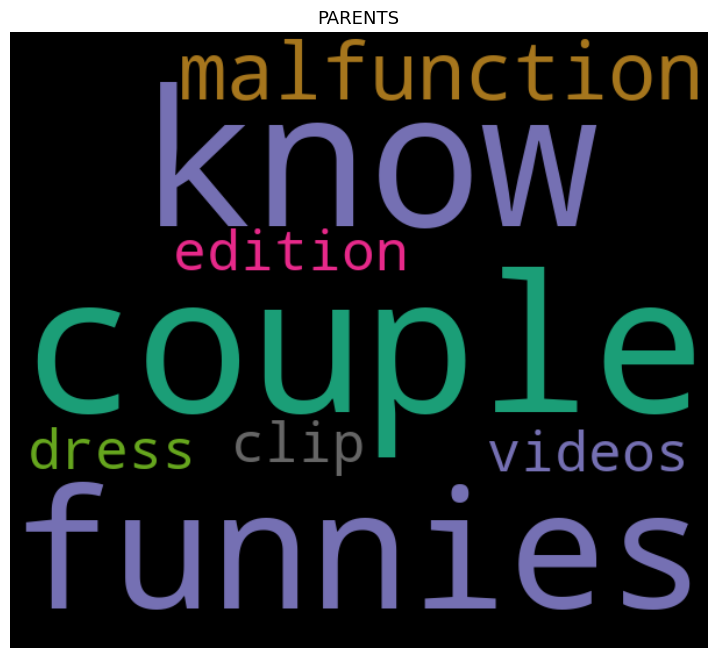

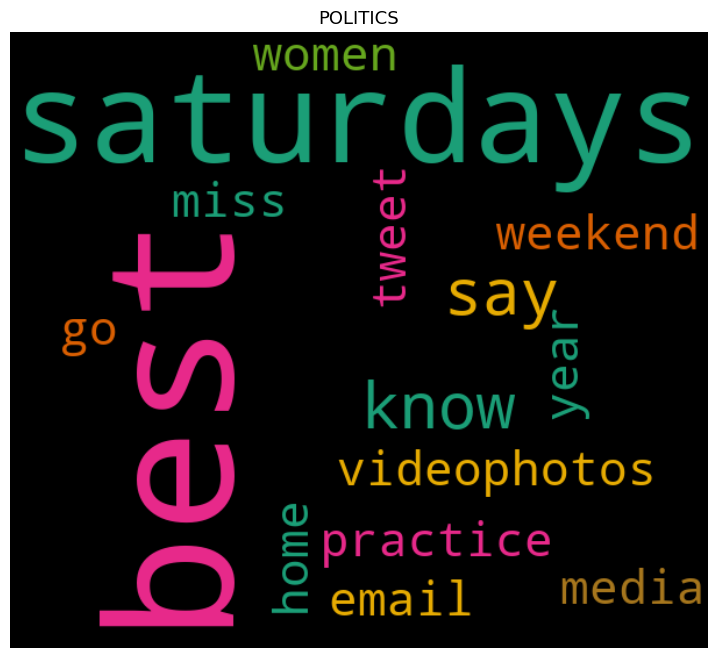

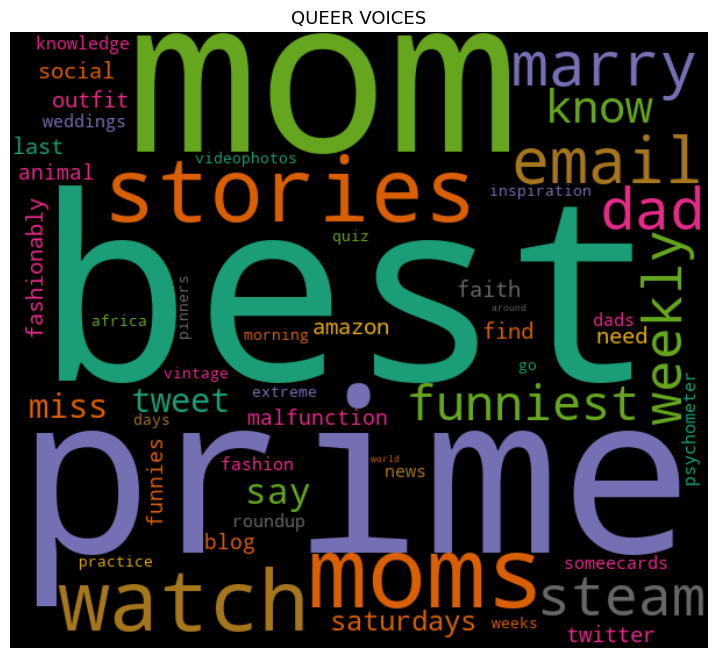

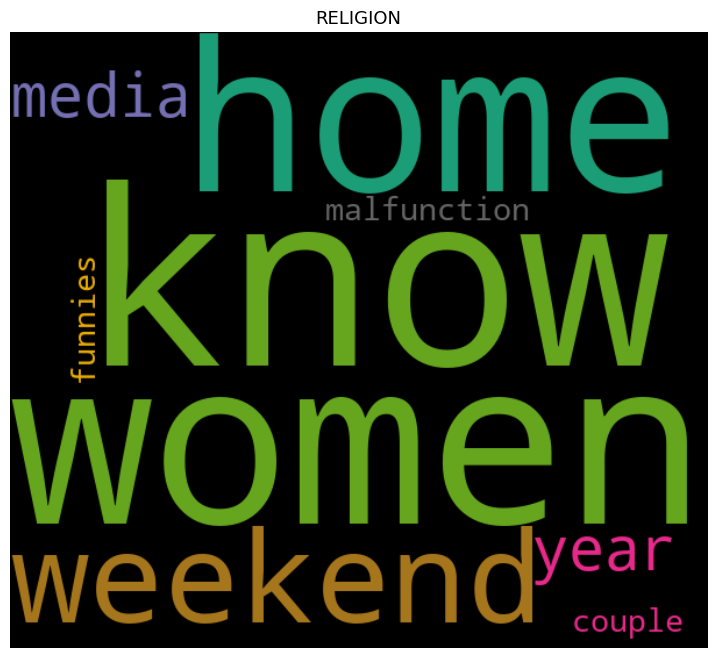

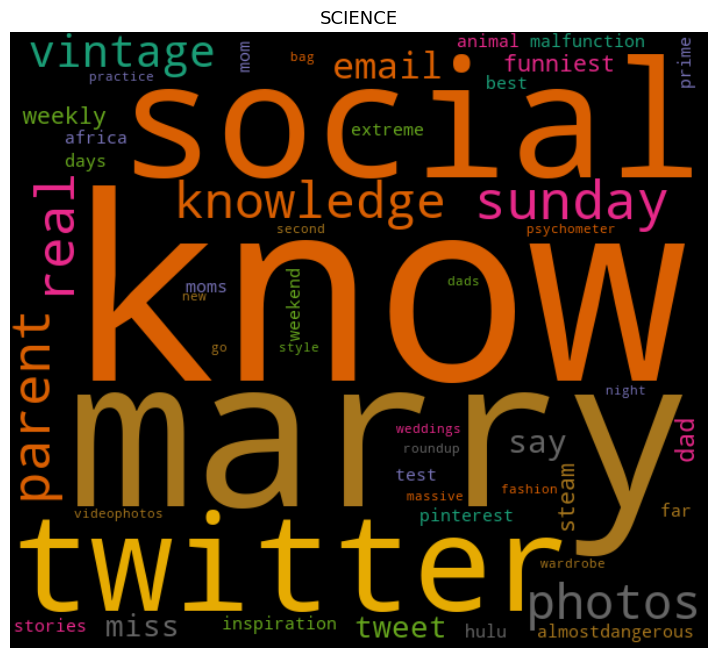

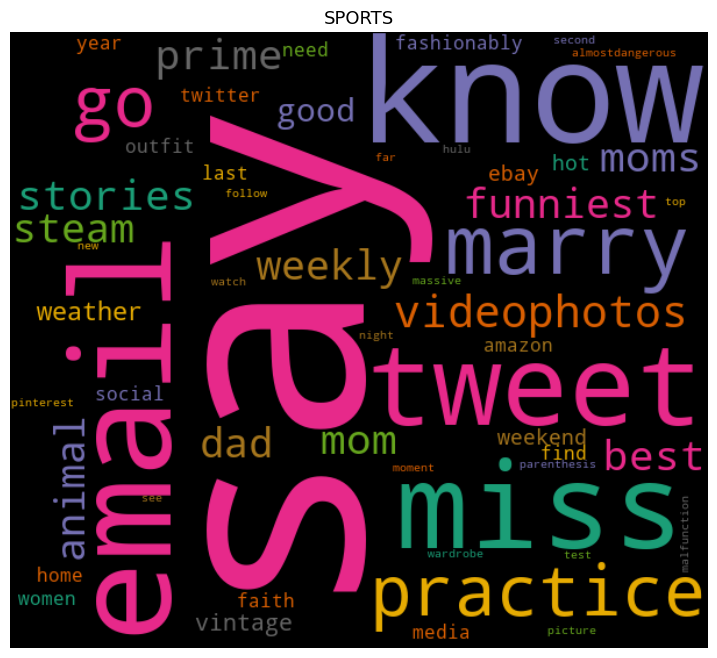

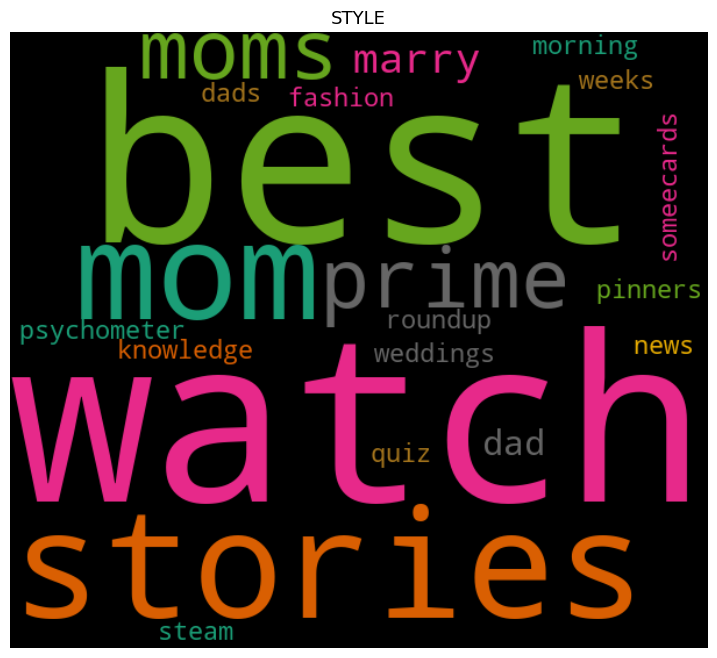

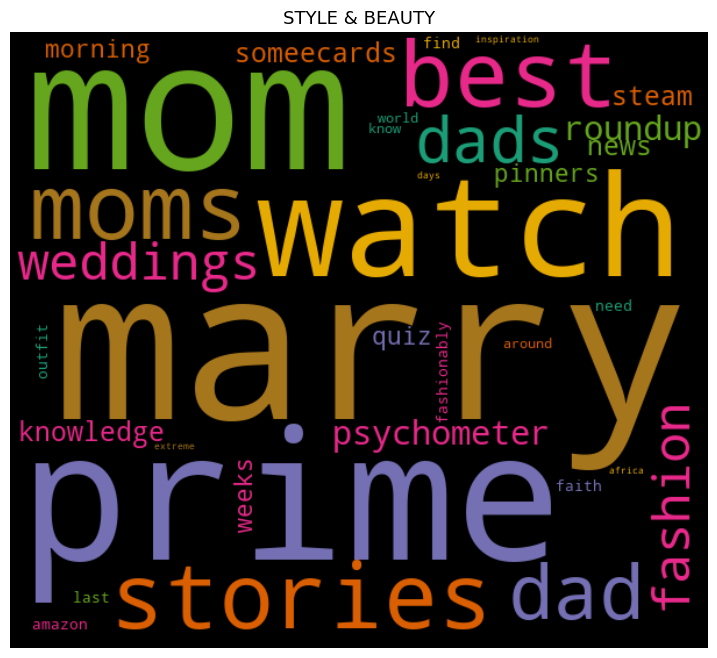

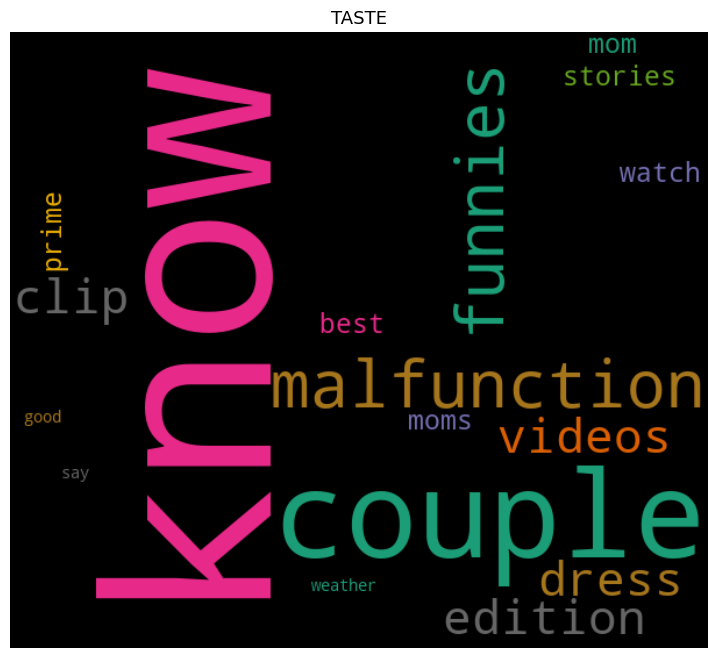

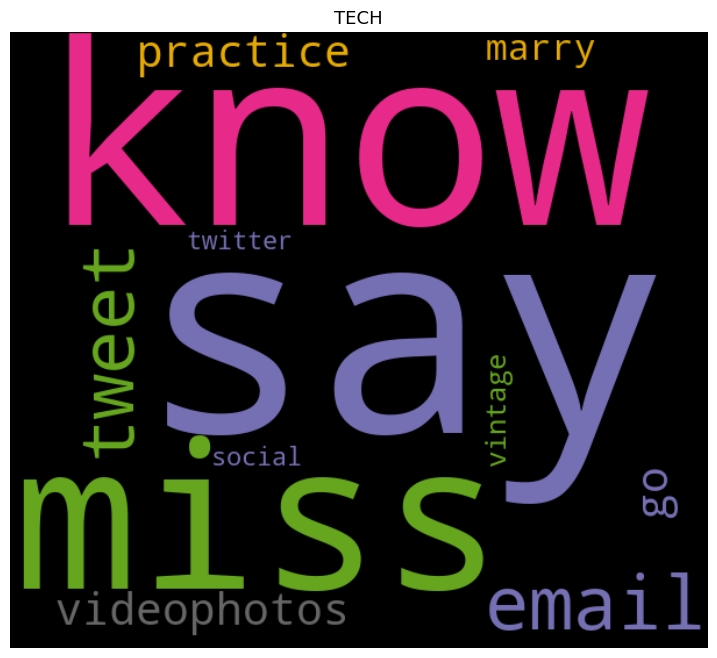

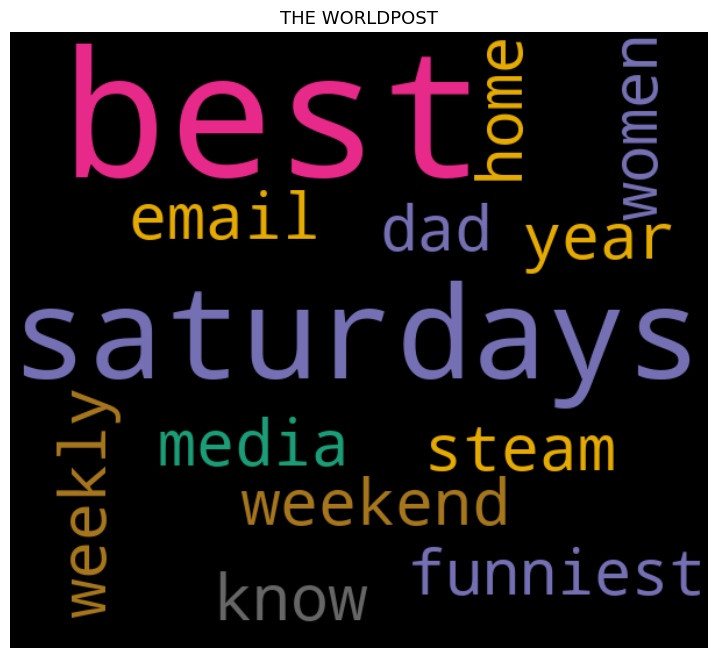

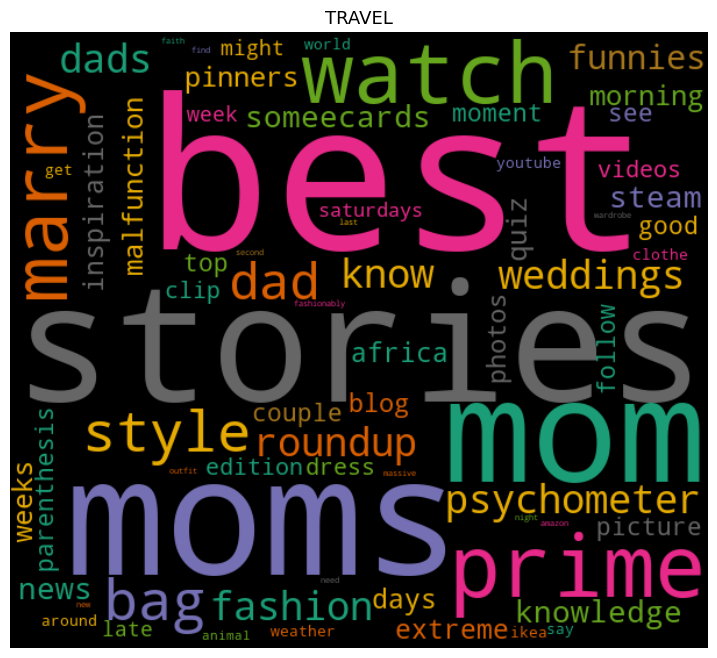

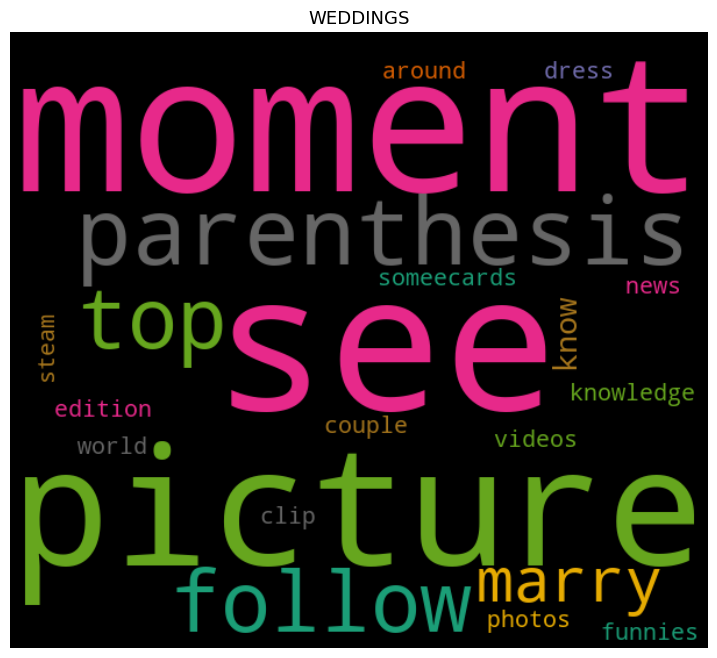

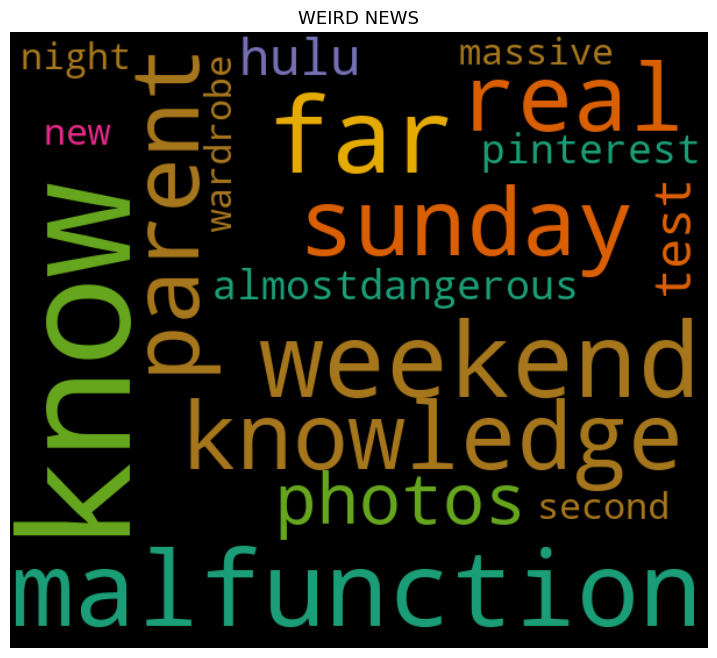

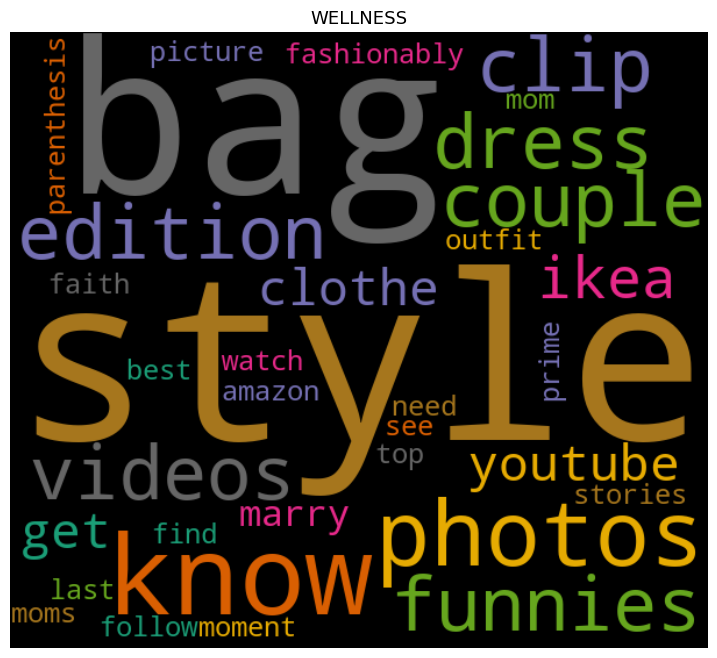

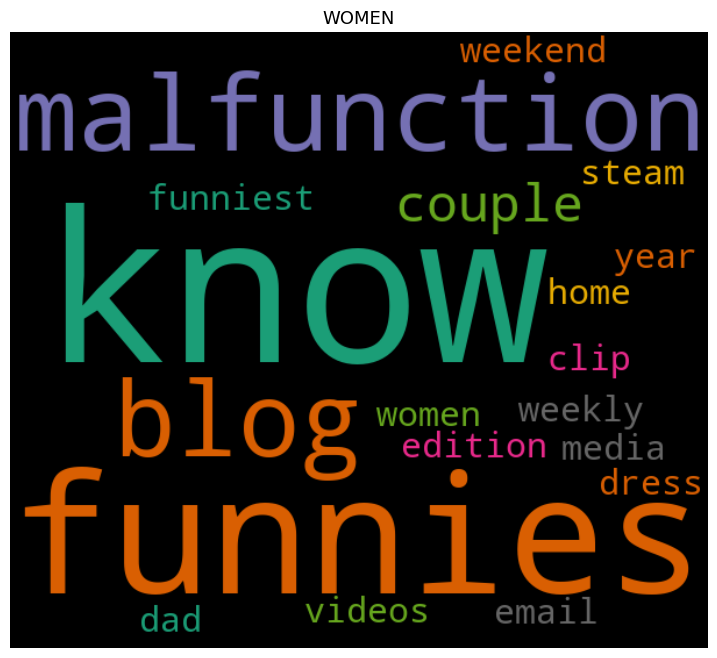

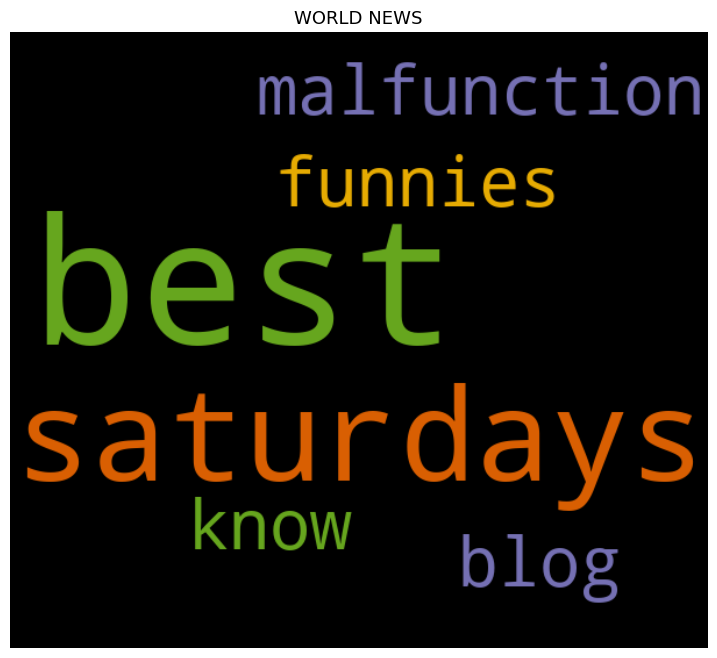

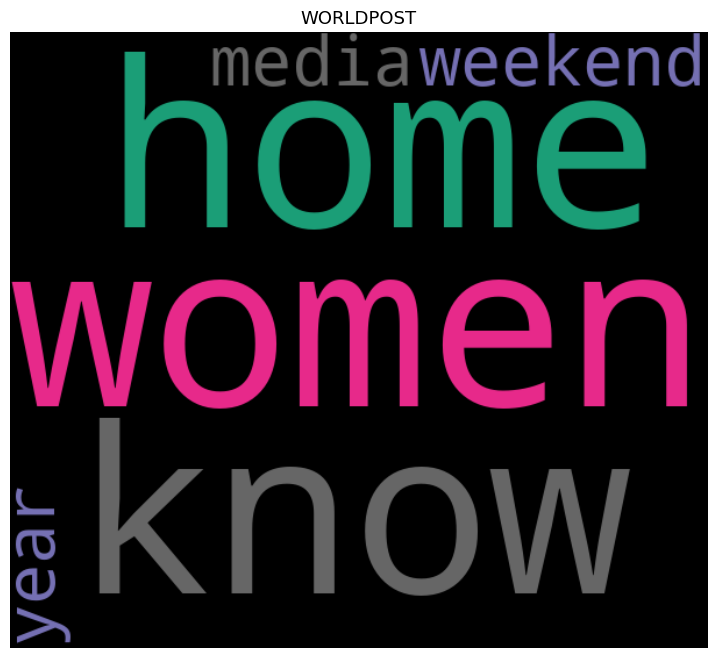

In [41]:
for index, headline in enumerate(text_dtm_1.columns):
    wordcloud(text_dtm_1[headline].sort_values(ascending=False),headline)

In [42]:
df_stage_2['News_length_h']= df_stage_2['News Headline'].str.len()
df_stage_2['News_length_h']=df_stage_2['News_length_h'].astype(int)
df_stage_2

News Headline Article category  \
0         [real, weddings, couple, get, marry, weekend]         WEDDINGS   
1                                        [moment, know]         WELLNESS   
2                                     [sunday, roundup]         POLITICS   
3     [funniest, parent, tweet, moms, dads, say, twi...          PARENTS   
4                        [watch, second, social, media]         BUSINESS   
...                                                 ...              ...   
6406                                  [sunday, roundup]    THE WORLDPOST   
6407  [best, parent, tweet, moms, dads, say, twitter...            MONEY   
6408  [real, weddings, couple, get, marry, weekend, ...    ENTERTAINMENT   
6409          [parenthesis, best, mom, dad, blog, week]     FOOD & DRINK   
6410                [watch, top, youtube, videos, week]             TECH   

      News_length_h  
0                 6  
1                 2  
2                 2  
3                 8  
4                 4  
...             ...  
6406              2  
6407              8  
6408              7  
6409              6  
6410              5  

[6411 rows x 3 columns]

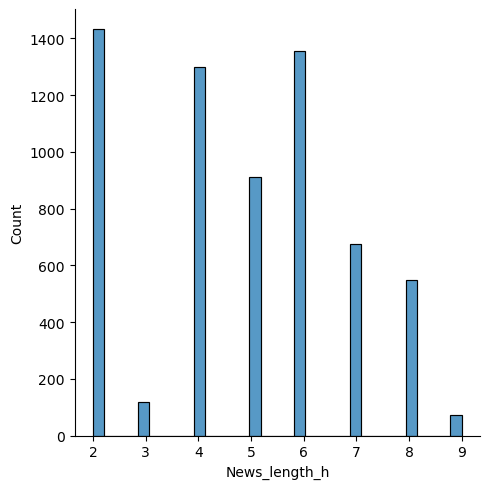

In [43]:
sns.displot(df_stage_2['News_length_h']);

# END OF TASK2

# Start of Project Task 3: Deep Learning Model Building

In [44]:
df_stage_2.drop(['News_length_h'], inplace=True, axis=1)

In [45]:
df_stage_2.head(3)

News Headline Article category
0  [real, weddings, couple, get, marry, weekend]         WEDDINGS
1                                 [moment, know]         WELLNESS
2                              [sunday, roundup]         POLITICS

In [46]:
df_stage_2['Article category'].nunique()

41

In [47]:
!pip install tensorflow
!pip install keras_preprocessing
import tensorflow
import numpy as np
import keras_preprocessing
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from tensorflow import keras
import keras
from keras.layers import Dense, Activation, Input, Dropout
from keras.models import Model
from numpy import array
from keras.preprocessing.text import one_hot
from keras.models import Sequential
from keras.layers import Flatten
import os
from markupsafe import escape
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split, cross_val_score
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder



# model building imports
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras.layers import Conv1D, SimpleRNN, Bidirectional, MaxPooling1D, GlobalMaxPool1D, LSTM, GRU
from keras.models import Sequential
from keras.regularizers import L1L2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 21.12.2 requires cupy-cuda115, which is not installed.
tfx-bsl 1.12.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.83.0 which is incompatible.
tfx-bsl 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
tensorflow-transform 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
apache-beam 2.44.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.
     ━━━━━━━

In [48]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(df_stage_2['Article category'])
X = df_stage_2['News Headline']

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
print("shape of input data: ", X.shape)
print("shape of target variable: ", y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=78)

shape of input data:  (6411,)
shape of target variable:  (6411,)


In [50]:
tokenizer = Tokenizer(num_words=100000, oov_token='<00V>') 
tokenizer.fit_on_texts(X_train) # build the word index
# padding X_train text input data
train_seq = tokenizer.texts_to_sequences(X_train) # converts strings into integer lists
#print(len(min(train_seq, key=len)))
train_padseq = pad_sequences(train_seq, maxlen=9, truncating="post", padding="post") # pads the integer lists to 2D integer tensor 
# padding X_test text input data
test_seq = tokenizer.texts_to_sequences(X_test)
##print(len(max(test_seq, key=len)))
test_padseq = pad_sequences(test_seq, maxlen=9, truncating="post", padding="post")

word_index = tokenizer.word_index
max_words = 150000  # total number of words to consider in embedding layer
total_words = len(word_index)
maxlen = 9 # max length of sequence 
y_train = to_categorical(y_train, num_classes=41)
y_test = to_categorical(y_test, num_classes=41)
print("Length of word index:", total_words)

Length of word index: 96


In [51]:
# basline model using embedding layers and simpleRNN
model = Sequential()
model.add(Embedding(total_words, 70, input_length=maxlen))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
model.add(SimpleRNN(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(41, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 9, 70)             6720      
                                                                 
 bidirectional (Bidirectiona  (None, 9, 128)           17280     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 9, 128)           24704     
 nal)                                                            
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                5152      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 41)                1

In [52]:
model.compile("rmsprop", "categorical_crossentropy", metrics=["accuracy"])
# fit model to the data
history = model.fit(train_padseq, y_train, batch_size=128, epochs=15)
# evalute the model
test_loss, test_acc = model.evaluate(test_padseq, y_test, verbose=0)
print("test loss and accuracy:", test_loss, test_acc)

Epoch 1/15
41/41 [==============================] - 15s 135ms/step - loss: 2.8370 - accuracy: 0.3177
Epoch 2/15
41/41 [==============================] - 3s 85ms/step - loss: 2.2010 - accuracy: 0.4682
Epoch 3/15
41/41 [==============================] - 3s 83ms/step - loss: 1.9688 - accuracy: 0.4994
Epoch 4/15
41/41 [==============================] - 3s 76ms/step - loss: 1.8502 - accuracy: 0.5031
Epoch 5/15
41/41 [==============================] - 3s 75ms/step - loss: 1.7731 - accuracy: 0.5000
Epoch 6/15
41/41 [==============================] - 3s 74ms/step - loss: 1.7238 - accuracy: 0.5023
Epoch 7/15
41/41 [==============================] - 3s 71ms/step - loss: 1.6886 - accuracy: 0.5045
Epoch 8/15
41/41 [==============================] - 3s 75ms/step - loss: 1.6600 - accuracy: 0.5090
Epoch 9/15
41/41 [==============================] - 3s 68ms/step - loss: 1.6431 - accuracy: 0.5066
Epoch 10/15
41/41 [==============================] - 3s 76ms/step - loss: 1.6272 - accuracy: 0.5109
Epoch 1

# End of Task 3

# Submitted By: Lalit Kumar
# IDMA PT 3